In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: read the dataset

In [2]:
import pandas as pd

df = pd.read_csv('iris.csv', na_values=['', 'NA'], keep_default_na=False)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2: Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
m = df.isna().sum()
m[m>0]

Series([], dtype: int64)

In [5]:
df.duplicated().sum()

np.int64(1)

### Step 3: Seperate X and Y(species)

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Step 4: apply preprocessing on X

In [9]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]).set_output(transform='pandas')

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Step 5 : APply train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

In [15]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.280340,0.098217,0.649083,0.395774
49,-1.021849,0.558611,-1.340227,-1.315444
65,1.038005,0.098217,0.364896,0.264142
118,2.249683,-1.052767,1.785832,1.448832
55,-0.173674,-0.592373,0.421734,0.132510


In [16]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052506,-1.052767,0.137547,0.000878
44,-0.900681,1.709595,-1.056039,-1.052180
7,-1.021849,0.788808,-1.283389,-1.315444
21,-0.900681,1.479398,-1.283389,-1.052180
95,-0.173674,-0.131979,0.251221,0.000878


In [17]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [18]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


### Step 6: build the model

In [19]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(xtrain, ytrain)

LogisticRegression()

In [20]:
model1.score(xtrain, ytrain)

0.98

In [21]:
model1.score(xtest, ytest)

0.94

### Evaluate the model

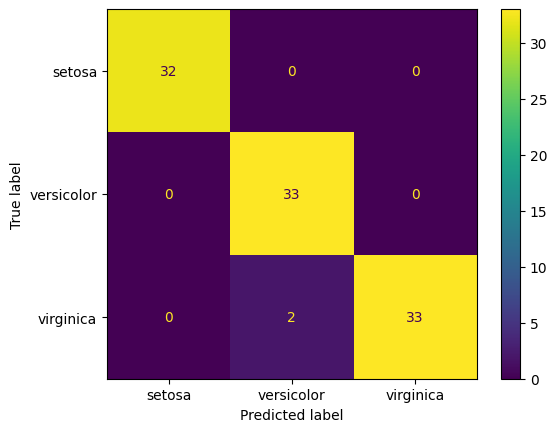

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model1, xtrain, ytrain)

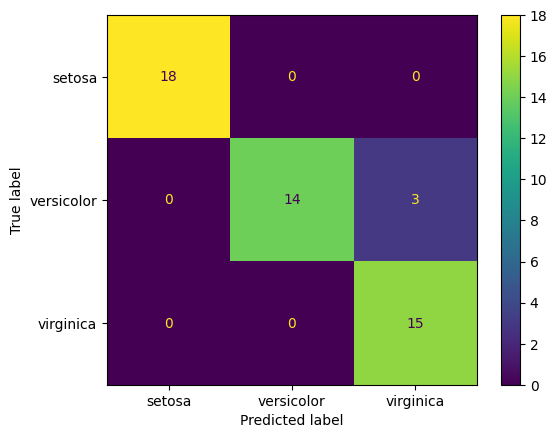

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model1, xtest, ytest)

In [24]:
ypred_train = model1.predict(xtrain)
ypred_test = model1.predict(xtest)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytrain, ypred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.94      1.00      0.97        33
   virginica       1.00      0.94      0.97        35

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [26]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



### On test data i have f1 macro score of 0.94 which is very good model

### out of sample predictions

In [27]:
xnew = pd.read_csv('iris_sample.csv')
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [29]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [31]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [32]:
preds = model1.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [33]:
probs = model1.predict_proba(xnew_pre)
probs

array([[1.93292727e-02, 8.82537594e-01, 9.81331333e-02],
       [1.80315390e-04, 6.76221053e-02, 9.32197579e-01],
       [9.73213051e-02, 8.91868487e-01, 1.08102083e-02],
       [7.45709340e-01, 2.54116291e-01, 1.74368528e-04],
       [5.90541932e-03, 3.31763397e-01, 6.62331183e-01],
       [9.63296887e-01, 3.67026084e-02, 5.04715947e-07],
       [1.60683756e-01, 8.11677570e-01, 2.76386741e-02],
       [7.55605408e-04, 1.55677416e-01, 8.43566978e-01],
       [9.85175448e-01, 1.48243463e-02, 2.05612795e-07],
       [8.87027458e-01, 1.12886703e-01, 8.58384446e-05],
       [2.30367528e-02, 8.97506058e-01, 7.94571891e-02],
       [2.62907569e-02, 9.48058330e-01, 2.56509126e-02],
       [3.40647499e-06, 1.34534099e-02, 9.86543184e-01],
       [5.75880409e-03, 6.45418038e-01, 3.48823158e-01],
       [4.93349887e-04, 4.04352561e-01, 5.95154090e-01]])

In [35]:
import numpy as np
max_prob = np.max(probs, axis=1)
max_prob

array([0.88253759, 0.93219758, 0.89186849, 0.74570934, 0.66233118,
       0.96329689, 0.81167757, 0.84356698, 0.98517545, 0.88702746,
       0.89750606, 0.94805833, 0.98654318, 0.64541804, 0.59515409])

In [36]:
xnew['Species_preds'] = preds
xnew['prob'] = max_prob

In [37]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,Species_preds,prob
0,5.5,2.5,4.0,1.3,versicolor,0.882538
1,6.9,3.1,5.1,2.3,virginica,0.932198
2,5.1,2.5,3.0,1.1,versicolor,0.891868
3,4.4,2.9,NaN,0.2,setosa,0.745709
4,5.9,3.0,5.1,1.8,virginica,0.662331
5,5.5,3.5,1.3,0.2,setosa,0.963297
6,5.6,NaN,3.6,1.3,versicolor,0.811678
7,6.5,3.0,5.2,2.0,virginica,0.843567
8,5.3,3.7,1.5,0.2,setosa,0.985175
9,5.1,3.4,1.5,NaN,setosa,0.887027


In [38]:
xnew.to_csv('Results.csv', index=False)